In [5]:
import os
import glob

In [ ]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
import TimeTagger as TT
from TimeTagger import Flim, TimeTagStream, createTimeTaggerVirtual, EventGenerator, Countrate,ConstantFractionDiscriminator, DelayedChannel

In [7]:
glob.glob(r'C:\Users\lociuser\Documents\UserData\Jenu\BB_data\*')

['C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\Cycle00001_Filelist.txt',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\CYCLE_000001_RAWDATA_000034',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\LifetimeData_Cycle00001_000001.raw',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\LifetimeData_Cycle00001_000001.sdt',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\Thumbs.db',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001.env',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001.xml',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001_Cycle00001_Ch1_000001.ome.tif',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001_Cycle00001_Ch1_000002.ome.tif',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-0

In [10]:
filename = 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\CYCLE_000001_RAWDATA_000034'

## no ttbin header exists 
fr = TT.FileReader(filename)
print(fr.getConfiguration())

In [12]:
format_string = '{:>8} | {:>17} | {:>7} | {:>14} | {:>13}'
#print(format_string.format('TAG #', 'EVENT TYPE', 'CHANNEL', 'TIMESTAMP (ps)', 'MISSED EVENTS'))
#print('---------+-------------------+---------+----------------+--------------')

In [14]:
with open(filename,'rb') as fid:
    data = fid.read()

In [62]:
datax = np.frombuffer(data[:2**7],dtype=np.int8)

In [86]:
for i in range(len(datax)//16):
    print(" : ".join("{:02x}".format(c) for c in datax[(i*16):(i+1)*16]))

00 : 00 : 00 : 00 : -4 : -1 : -1 : -1 : 0c : 6b : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -b : 03 : 00 : 00 : -1d : 6d : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 04 : 00 : 00 : 00 : -47 : 70 : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 03 : 00 : 00 : 00 : -2e : -7b : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -5 : -1 : -1 : -1 : 04 : 0e : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 03 : 00 : 00 : 00 : 10 : 11 : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -a : 03 : 00 : 00 : 59 : 12 : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 05 : 00 : 00 : 00 : -53 : 16 : 12 : 34 : -2c : -a : 3b : 00


In [33]:
datax = np.frombuffer(data[:2**7],dtype=np.int16)
datax

array([     0,      0,     -4,     -1,  27404,   9421,  -2348,     59,
            0,      0,   1013,      0,  28131,   9421,  -2348,     59,
            0,      0,      4,      0,  28857,   9421,  -2348,     59,
            0,      0,      3,      0, -31278,   9421,  -2348,     59,
            0,      0,     -5,     -1,   3588,  13330,  -2348,     59,
            0,      0,      3,      0,   4368,  13330,  -2348,     59,
            0,      0,   1014,      0,   4697,  13330,  -2348,     59,
            0,      0,      5,      0,   5805,  13330,  -2348,     59],
      dtype=int16)

In [30]:
channels = np.frombuffer(data,dtype=np.int16)[2::8]

In [31]:
len(channels)

55111328

In [32]:
set(channels)

{-5, -4, 1, 2, 3, 4, 5, 1013, 1014}

In [95]:
for k in [1, 2, 3, 4,-4, 5,-5, 1013, 1014]:
    k_occurances = len(np.where(channels==k)[0])
    print(f'{k:4} {k_occurances:8} {k_occurances*100/len(channels):5.2f}%')

   1        1       0.00%
   2  8388716      15.22%
   3 11668186      21.17%
   4  6628098      12.03%
  -4  6628224      12.03%
   5  5065332       9.19%
  -5  5065259       9.19%
1013  6627869      12.03%
1014  5039643       9.14%


In [109]:
(8388716)-(512*512*32)

108

In [96]:
tagformat = np.dtype([
    # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
    ('type', 'u1'),
    # ('reserved',      'i1'),
    ('missed_events', '<u2'),
    ('channel', '<i4'),
    ('time', '<i8'),], align=True)

In [97]:
data_ = np.frombuffer(data, dtype=tagformat)

In [104]:
data_[0], data_[-1]

((0, 0, -4, 16878414636870412), (0, 0, 1013, 16917616876477258))

In [105]:
(data_[-1]['time'] - data_[0]['time'])/1e12, 'secs'

(39.202239606846, 'secs')

In [140]:
start_time = data_[0]['time']

In [112]:
%time
for k in data_[:1000]:
    if k['channel']==2:
        break

CPU times: total: 0 ns
Wall time: 0 ns


In [116]:
len(data_)/1E6

55.111328

In [144]:
%%time
times = [k['time']-start_time for k in data_[:1000000] if (k['channel']==2)]

CPU times: total: 734 ms
Wall time: 814 ms


In [220]:
invalid_index = np.where(data_['type']!=0)
print('NON TAGGED' ,len(invalid_index[0]))

NON TAGGED 0


In [221]:
missed_events = np.where(data_['missed_events']!=0)
print('MISSED' ,len(missed_events[0]))

MISSED 0


In [161]:
%%time
pixel_index = np.where(data_['channel']==2)

CPU times: total: 312 ms
Wall time: 302 ms


In [174]:
%%time
pixels=[]
for pixel_number in range(len(pixel_index[0])):
    #print(pixel_number,end='-')
    pixels.append(data_[pixel_index[0][pixel_number]:pixel_index[0][pixel_number+1]])    
    if pixel_number == 512*512:
        break

CPU times: total: 156 ms
Wall time: 238 ms


In [197]:
%%time
ch1=[]
sync=[]
ch2=[]
for pixel in pixels:
    ch1_times  = [k['time']-start_time for k in pixel if (k['channel']==1013)]
    ch2_times  = [k['time']-start_time for k in pixel if (k['channel']==1014)]
    sync_times = [k['time']-start_time for k in pixel if (k['channel']==3)]
    ch1.append(ch1_times)
    ch2.append(ch2_times)    
    sync.append(sync_times)

CPU times: total: 4.98 s
Wall time: 5.13 s


196458
151752
348171
CPU times: total: 250 ms
Wall time: 323 ms


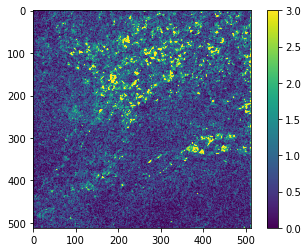

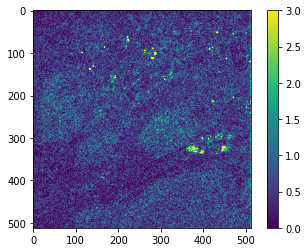

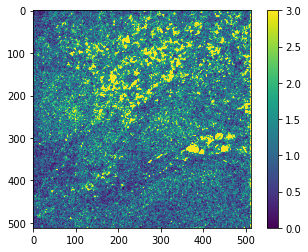

In [212]:
%%time
for channel_name in [ch1,ch2,sync]:
    img = [len(k) for k in channel_name]
    imgx = np.array(img)[:512*512].reshape([512,512])
    print(imgx.sum())
    figure()
    imshow(imgx,vmax=3)
    colorbar()

In [213]:
196458+ 151752 - 348171

39

In [225]:
n_pixels =  500
for k1,k2,k3 in zip(ch1[:n_pixels],ch2[:n_pixels],sync[:n_pixels]):    
    if len(k1)+len(k2) !=len(k3):
        print(k1,k2,k3)    

[416611221306] [] [416610582741, 416611231951]
[417322766388] [417323314619, 417323444142, 417324529637] [417322777342, 417322789836, 417323314206, 417323451527, 417324537701]
[] [417364004714] [417361929637, 417364014597]


In [226]:
%%time
imp=0
n_pixels=len(ch1)
for k1,k2,k3 in zip(ch1[:n_pixels],ch2[:n_pixels],sync[:n_pixels]):    
    if len(k1)+len(k2) !=len(k3):
        imp+=1
imp,n_pixels

CPU times: total: 46.9 ms
Wall time: 191 ms


(2910, 262145)

In [227]:
512*512

262144